### Importing libraries and data

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
# df_confirmed = pd.read_csv('covid19_Confirmed_dataset.csv')
df_confirmed = pd.read_csv('time_series_covid_19_confirmed.csv')
df_happy = pd.read_csv('worldwide_happiness_report.csv')

In [3]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,45723,45844,46116,46274,46516,46718,46837,46837,47072,47306
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,36245,36790,37625,38182,39014,39719,40501,41302,42148,42988
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,80168,81212,82221,83199,84152,85084,85927,86730,87502,88252
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,6610,6610,6712,6745,6790,6842,6904,6955,7005,7050
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,15008,15087,15103,15139,15251,15319,15361,15493,15536,15591


In [4]:
df_happy.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [5]:
df_confirmed.shape, df_happy.shape

((271, 324), (156, 9))

In [6]:
# deleting lat-long columns
df_confirmed = df_confirmed.drop(columns=['Lat','Long'])
df_confirmed.head(2)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,45723,45844,46116,46274,46516,46718,46837,46837,47072,47306
1,NaN,Albania,0,0,0,0,0,0,0,0,...,36245,36790,37625,38182,39014,39719,40501,41302,42148,42988


In [7]:
# Aggregating at a country level
# df_confirmed = df_confirmed.groupby(['Country/Region'], as_index=False).sum()
df_confirmed = df_confirmed.groupby(['Country/Region']).sum()

df_confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,45723,45844,46116,46274,46516,46718,46837,46837,47072,47306
Albania,0,0,0,0,0,0,0,0,0,0,...,36245,36790,37625,38182,39014,39719,40501,41302,42148,42988
Algeria,0,0,0,0,0,0,0,0,0,0,...,80168,81212,82221,83199,84152,85084,85927,86730,87502,88252
Andorra,0,0,0,0,0,0,0,0,0,0,...,6610,6610,6712,6745,6790,6842,6904,6955,7005,7050
Angola,0,0,0,0,0,0,0,0,0,0,...,15008,15087,15103,15139,15251,15319,15361,15493,15536,15591


In [8]:
df_confirmed.shape

(191, 320)

### Visualizing data related to some countries

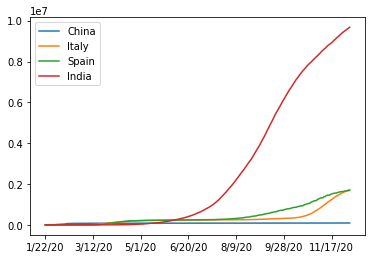

In [9]:
df_confirmed.loc["China"].plot()
df_confirmed.loc["Italy"].plot()
df_confirmed.loc["Spain"].plot()
df_confirmed.loc["India"].plot()

plt.legend()

### Calculating a good measure 
We need to find a good measure reperestend as a number. It describes the spread of the virus in a country. 

<AxesSubplot:>

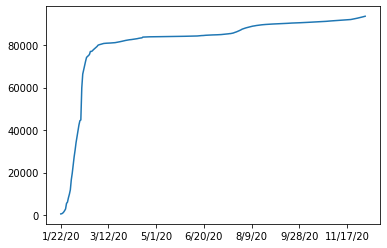

In [10]:
df_confirmed.loc['China'].plot()

<AxesSubplot:>

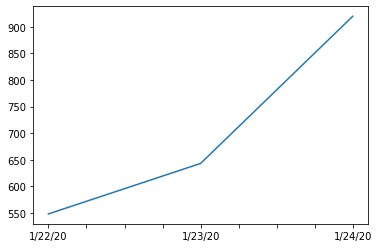

In [11]:
df_confirmed.loc['China'][:3].plot()

### Plotting the difference between 2 days i.e. the number of new infections per day

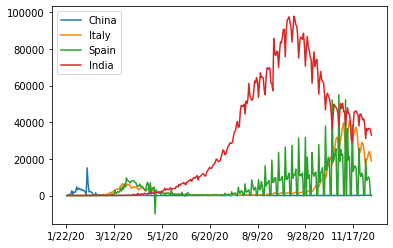

In [12]:
df_confirmed.loc['China'].diff().plot()
df_confirmed.loc['Italy'].diff().plot()
df_confirmed.loc['Spain'].diff().plot()
df_confirmed.loc['India'].diff().plot()

plt.legend()

### Find maxmimum infection rate

In [13]:
df_confirmed.loc['China'].diff().max()

15136.0

In [14]:
df_confirmed.loc['Italy'].diff().max()

40902.0

In [15]:
df_confirmed.loc['India'].diff().max()

97894.0

### Find maximum infection rate for all of the countries. 

In [16]:
countries = list(df_confirmed.index)
max_infection = []

for c in countries:
    max_infection.append(df_confirmed.loc[c].diff().max())

In [17]:
# adding max_infection list to the main dataframe

df_confirmed['max_infection'] = max_infection
df_confirmed.head(2)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,max_infection
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,45844,46116,46274,46516,46718,46837,46837,47072,47306,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,36790,37625,38182,39014,39719,40501,41302,42148,42988,846.0


In [18]:
# trimming the dataset to include only the countries and the maximum infection
df_corona = pd.DataFrame(df_confirmed['max_infection'])
df_corona.head()

,max_infection
Country/Region,
Afghanistan,915.0
Albania,846.0
Algeria,1133.0
Andorra,299.0
Angola,355.0


In [19]:
# Checking happiness report

df_happy.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [20]:
cols_to_drop = ['Overall rank','Score','Generosity','Perceptions of corruption']

df_happy = df_happy.drop(columns=cols_to_drop)

df_happy.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [21]:
# Make countries the index

df_happy.set_index(['Country or region'], inplace = True)
df_happy.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [22]:
# The shape of the 2 datasets show that the # of rows are different - therefore we use inner join

In [23]:
df_corona.shape, df_happy.shape

((191, 1), (156, 4))

In [24]:
# we use join since we are joining on the the index
df = df_corona.join(df_happy, how = 'inner')
df.head()

,max_infection,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,846.0,0.947,0.848,0.874,0.383
Algeria,1133.0,1.002,1.160,0.785,0.086
Argentina,18326.0,1.092,1.432,0.881,0.471
Armenia,2476.0,0.850,1.055,0.815,0.283


### Correlation matrix 

In [25]:
df.corr()

,max_infection,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection,1.000000,0.253117,0.182747,0.261623,0.060731
GDP per capita,0.253117,1.000000,0.757521,0.859431,0.394799
Social support,0.182747,0.757521,1.000000,0.751632,0.456317
Healthy life expectancy,0.261623,0.859431,0.751632,1.000000,0.423146
Freedom to make life choices,0.060731,0.394799,0.456317,0.423146,1.000000


### Visualization of the results

In [26]:
df.head()

,max_infection,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,846.0,0.947,0.848,0.874,0.383
Algeria,1133.0,1.002,1.160,0.785,0.086
Argentina,18326.0,1.092,1.432,0.881,0.471
Armenia,2476.0,0.850,1.055,0.815,0.283


#### Plotting GDP vs maximum Infection rate

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='GDP per capita', ylabel='max_infection'>

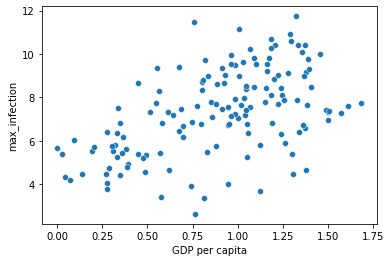

In [27]:
x = df['GDP per capita']
y = df['max_infection']

# sns.scatterplot(x,y)
# We will log-scale y since there is a lot of difference between the scale of x and y axis 
# which makes the data look unrelated.

sns.scatterplot(x,np.log(y))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='GDP per capita', ylabel='max_infection'>

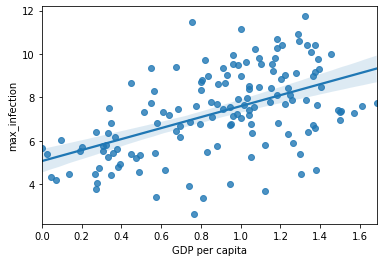

In [28]:
# to see that there is a positive slope, we use regplot

sns.regplot(x,np.log(y))

#### Plotting Social support vs maximum Infection rate

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Social support', ylabel='max_infection'>

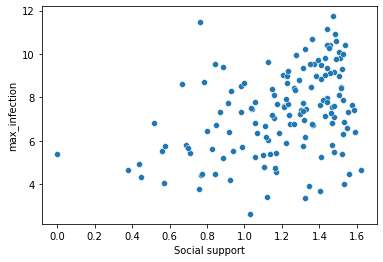

In [29]:
x = df['Social support']
y = df['max_infection']

# sns.scatterplot(x,y)
# We will log-scale y since there is a lot of difference between the scale of x and y axis 
# which makes the data look unrelated.

sns.scatterplot(x,np.log(y))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Social support', ylabel='max_infection'>

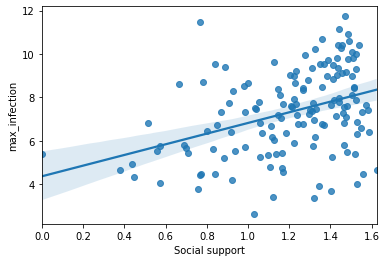

In [30]:
# to see that there is a positive slope, we use regplot

sns.regplot(x,np.log(y))

#### Plotting Healthy life expectancy vs maximum Infection rate

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Healthy life expectancy', ylabel='max_infection'>

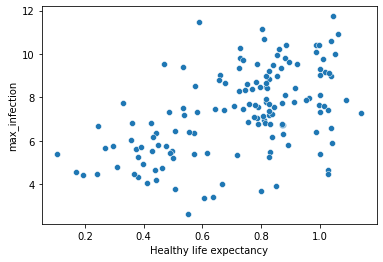

In [31]:
x = df['Healthy life expectancy']
y = df['max_infection']

# sns.scatterplot(x,y)
# We will log-scale y since there is a lot of difference between the scale of x and y axis 
# which makes the data look unrelated.

sns.scatterplot(x,np.log(y))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Healthy life expectancy', ylabel='max_infection'>

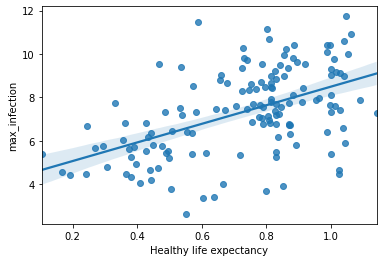

In [32]:
# to see that there is a positive slope, we use regplot

sns.regplot(x,np.log(y))

#### Plotting Freedom to make life choices vs maximum Infection rate

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Freedom to make life choices', ylabel='max_infection'>

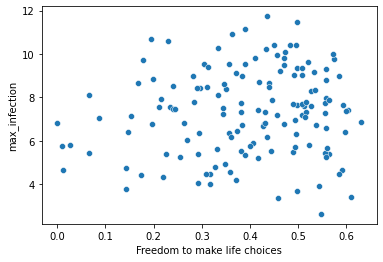

In [33]:
x = df['Freedom to make life choices']
y = df['max_infection']

# sns.scatterplot(x,y)
# We will log-scale y since there is a lot of difference between the scale of x and y axis 
# which makes the data look unrelated.

sns.scatterplot(x,np.log(y))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Freedom to make life choices', ylabel='max_infection'>

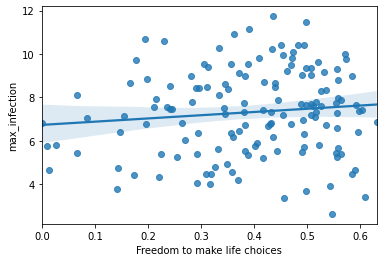

In [34]:
# to see that there is a positive slope, we use regplot

sns.regplot(x,np.log(y))

### Death vs happiness index

In [35]:
df_deaths = pd.read_csv('covid19_deaths_dataset.csv')

In [36]:
df_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [37]:
df_deaths.drop(columns=['Lat','Long'], inplace = True)
df_deaths.head(2)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31


In [38]:
df_deaths = df_deaths.groupby(['Country/Region']).sum()
df_deaths.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
Albania,0,0,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
Algeria,0,0,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [39]:
countries = list(df_deaths.index)
max_deaths = []

for c in countries:
    max_deaths.append(df_deaths.loc[c].diff().max())

# adding max_infection list to the main dataframe

df_deaths['max_deaths'] = max_deaths
df_deaths.head(2)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_deaths
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,40,42,43,47,50,57,58,60,64,7.0
Albania,0,0,0,0,0,0,0,0,0,0,...,27,27,27,27,28,28,30,30,31,4.0


In [40]:
df_deaths = pd.DataFrame(df_deaths['max_deaths'])
df_deaths.head(3)

,max_deaths
Country/Region,
Afghanistan,7.0
Albania,4.0
Algeria,30.0


In [41]:
df_d = df_deaths.join(df_happy, how = 'inner')

df_d.head()

,max_deaths,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,7.0,0.350,0.517,0.361,0.000
Albania,4.0,0.947,0.848,0.874,0.383
Algeria,30.0,1.002,1.160,0.785,0.086
Argentina,13.0,1.092,1.432,0.881,0.471
Armenia,3.0,0.850,1.055,0.815,0.283


In [42]:
df_d.corr()

,max_deaths,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_deaths,1.000000,0.259893,0.204148,0.309666,0.080166
GDP per capita,0.259893,1.000000,0.759468,0.863062,0.394603
Social support,0.204148,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.309666,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.080166,0.394603,0.456246,0.427892,1.000000


/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Social support', ylabel='max_deaths'>

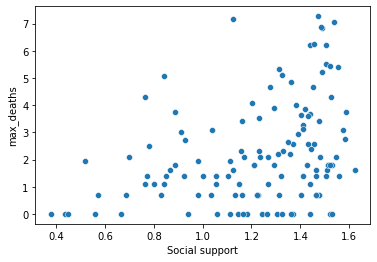

In [43]:
x = df_d['Social support']
y = df_d['max_deaths']

# sns.scatterplot(x,y)
# We will log-scale y since there is a lot of difference between the scale of x and y axis 
# which makes the data look unrelated.

sns.scatterplot(x,np.log(y))

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Social support', ylabel='max_deaths'>

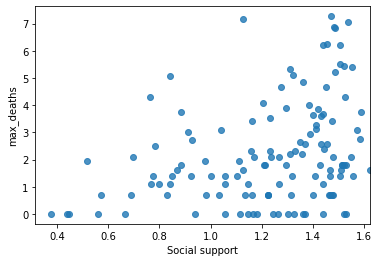

In [44]:
sns.regplot(x,np.log(y))